In [8]:
from random import choices, sample
from math import comb, perm

In [9]:
help('random.choices')

Help on method choices in random:

random.choices = choices(population, weights=None, *, cum_weights=None, k=1) method of random.Random instance
    Return a k sized list of population elements chosen with replacement.

    If the relative weights or cumulative weights are not specified,
    the selections are made with equal probability.



In [10]:
help('random.sample')

Help on method sample in random:

random.sample = sample(population, k, *, counts=None) method of random.Random instance
    Chooses k unique random elements from a population sequence.

    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).

    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.

    Repeated elements can be specified one at a time or with the optional
    counts parameter.  For example:

        sample(['red', 'blue'], counts=[4, 2], k=5)

    is equivalent to:

        sample(['red', 'red', 'red', 'red', 'blue', 'blue'], k=5)

    To choose a sample from a range of integ

In [31]:
def ex1():
    nr_cel_putin_una_rosie = 0
    nr_toate_rosii = 0
    for i in range (1000):
        nr_rosii_extrase = 0 
        lista_init = ['r','r','r','r','r','v','v','a','a','a']
        elems = sample(lista_init,3)
        for k in range (3):
            if elems[k] == 'r':
                nr_rosii_extrase +=1
        if nr_rosii_extrase > 0:
            nr_cel_putin_una_rosie +=1
            if nr_rosii_extrase == 3:
                nr_toate_rosii +=1
    print("Valoarea dupa simulari:", (nr_toate_rosii/1000)/(nr_cel_putin_una_rosie/1000))
    pA = 1 - comb(5, 0)*comb(5,3) / comb(10, 3)
    pAB = (comb(5, 3)+comb(3,3)+comb(2,3)) / comb(10, 3)

    print("Valoarea teoretica a P(B|A) = ", pAB / pA)           

In [32]:
ex1()

Valoarea dupa simulari: 0.07886089813800656
Valoarea teoretica a P(B|A) =  0.09999999999999999


In [36]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend

In [46]:
def ex2():
    data = [randrange(0,7) for _ in range(500)]
    bin_edges = [k+0.5 for k in range(0,7)]
    hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
    alpha = 0.5, label = 'frecvente relative')
    distribution = dict([(i,1/6) for i in range(1,7)])
    bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
    alpha= 0.6, label = 'probabilitati')
    legend(loc = 'lower left')
    grid()
    show()

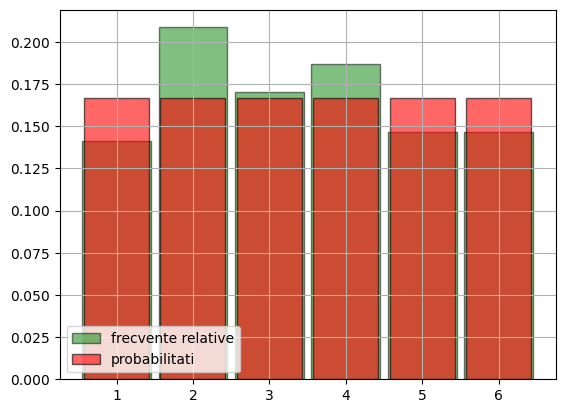

In [57]:
ex2()

In [82]:
from scipy.stats import binom
help('scipy.stats.binom.rvs')
#help('scipy.stats.binom.pmf')
#help('scipy.stats.binom.cdf')

Help on method rvs in scipy.stats.binom:

scipy.stats.binom.rvs = rvs(*args, **kwargs) method of scipy.stats._discrete_distns.binom_gen instance
    Random variates of given type.

    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    size : int or tuple of ints, optional
        Defining number of random variates (Default is 1). Note that `size`
        has to be given as keyword, not as positional argument.
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional

        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a

In [78]:
def ex3():
    data = binom.rvs(n=5,p=6/10,size=1000)
    bin_edges = [k+0.5 for k in range(-1,6)]
    hist(data, bin_edges, density = True, rwidth = 0.9, color = 'green', edgecolor = 'black',
    alpha = 0.5, label = 'frecvente relative')
    distribution = dict([(i,binom.pmf(i,n=5,p=6/10)) for i in range(0,6)])
    bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
    alpha= 0.6, label = 'probabilitati')
    legend(loc = 'lower left')
    grid()
    show()

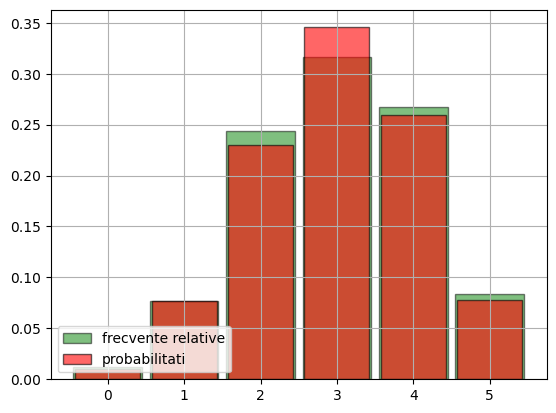

In [79]:
ex3()

In [81]:
data = binom.rvs(n=5,p=6/10,size=1000)
print(sum(2<x<=5 for x in data)/len(data))

0.687
